In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [4]:
df = pd.read_csv('Automobile_data.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [5]:
# df.replace("?", pd.NaT, inplace=True)
for column in df.columns:
    count = df[column].eq("?").sum()
    if count > 0: 
        print(f"{column}: {count}")

normalized-losses: 41
num-of-doors: 2
bore: 4
stroke: 4
horsepower: 2
peak-rpm: 2
price: 4


In [7]:
df=df[ df['price'] !='?']
columns_to_process = ['price', 'peak-rpm', 'horsepower', 'normalized-losses', 'bore', 'stroke']

for column in columns_to_process:
    df[column] = pd.to_numeric(df[column].replace('?', 0))

print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [8]:
df = df.apply(pd.to_numeric, errors='ignore')
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [18]:
df.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [12]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


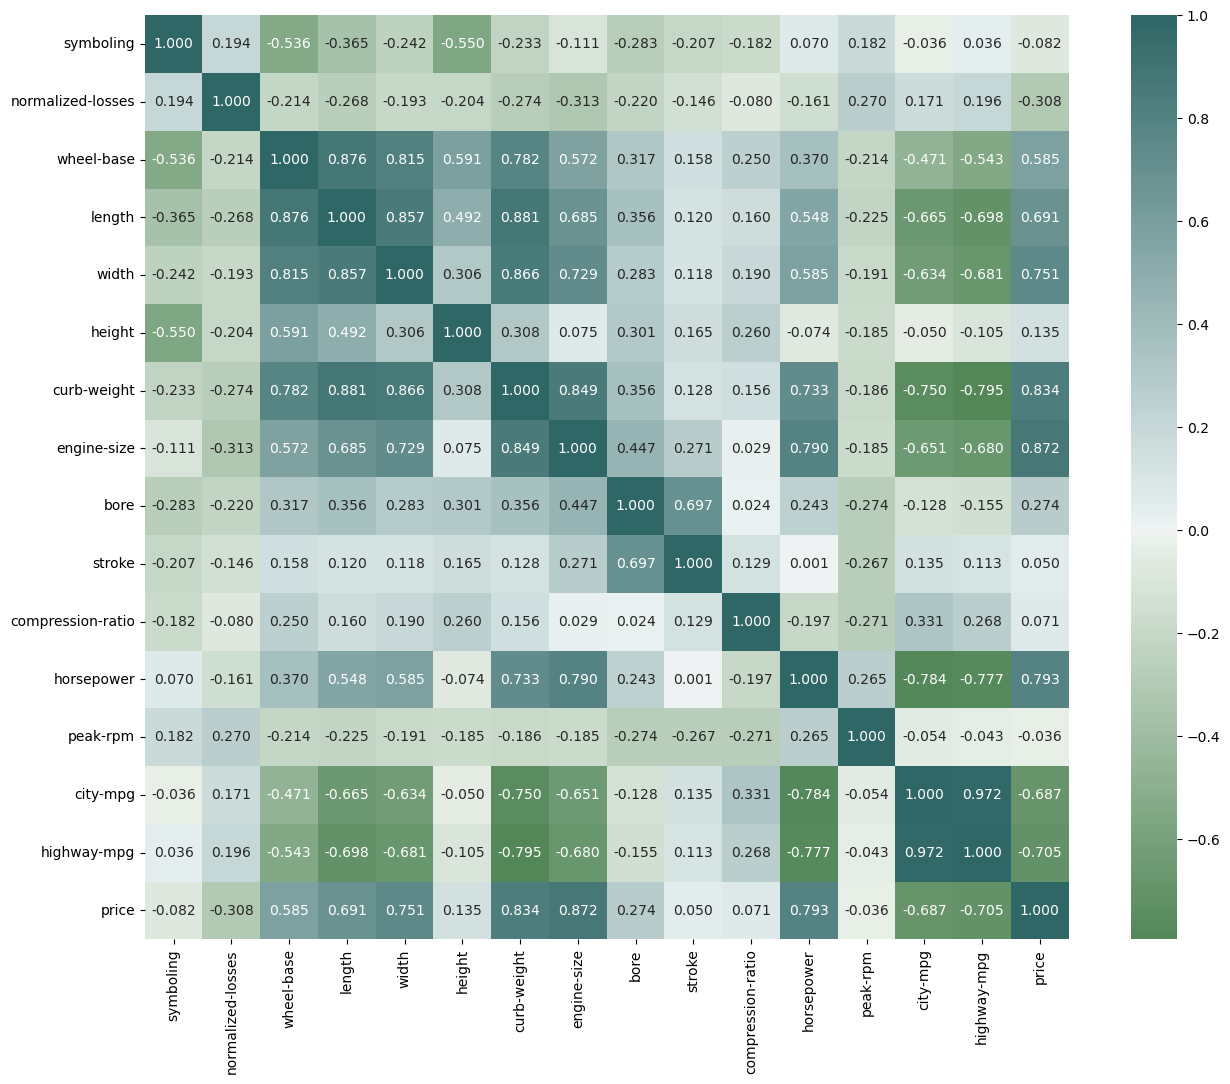

In [19]:
dataset2 = numeric_df.corr()
plt.figure(figsize=(16,12))

cmap = sns.diverging_palette(850, 190, s=75, l=40, n=9, center="light", as_cmap=True)
_ = sns.heatmap(dataset2, center=0, annot=True, fmt='.3f', square=True, cmap=cmap)

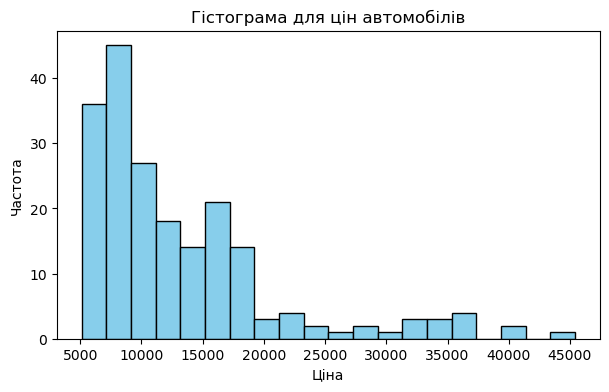

In [25]:
plt.figure(figsize=(7, 4))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Гістограма для цін автомобілів')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

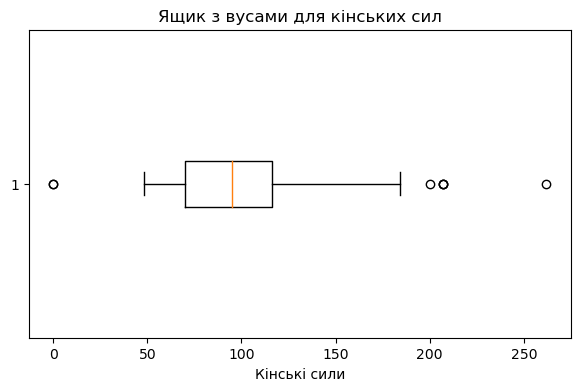

In [26]:
plt.figure(figsize=(7, 4))
plt.boxplot(df['horsepower'].dropna(), vert=False)
plt.title('Ящик з вусами для кінських сил')
plt.xlabel('Кінські сили')
plt.show()

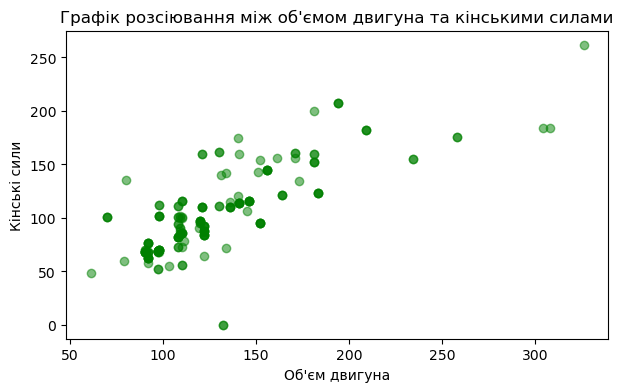

In [48]:
plt.figure(figsize=(7, 4))
plt.scatter(df['engine-size'], df['horsepower'], color='green', alpha=0.5)
plt.title('Графік розсіювання між об\'ємом двигуна та кінськими силами')
plt.xlabel('Об\'єм двигуна')
plt.ylabel('Кінські сили')
plt.show()

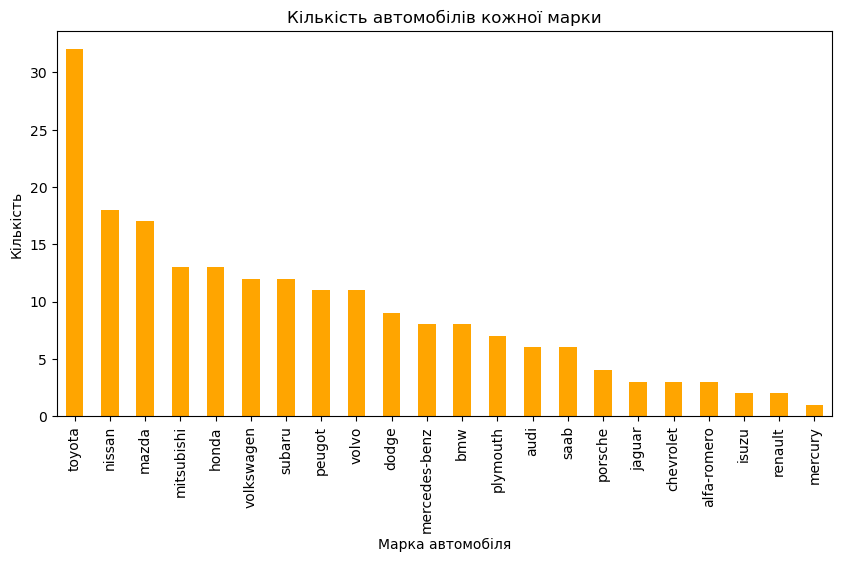

In [29]:
plt.figure(figsize=(10, 5))
df['make'].value_counts().plot(kind='bar', color='orange')
plt.title('Кількість автомобілів кожної марки')
plt.xlabel('Марка автомобіля')
plt.ylabel('Кількість')
plt.show()

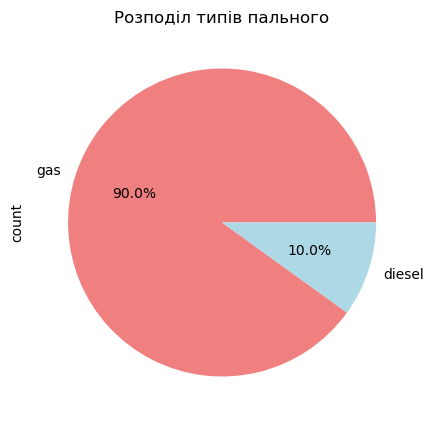

In [30]:
plt.figure(figsize=(5, 5))
df['fuel-type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Розподіл типів пального')
plt.show()

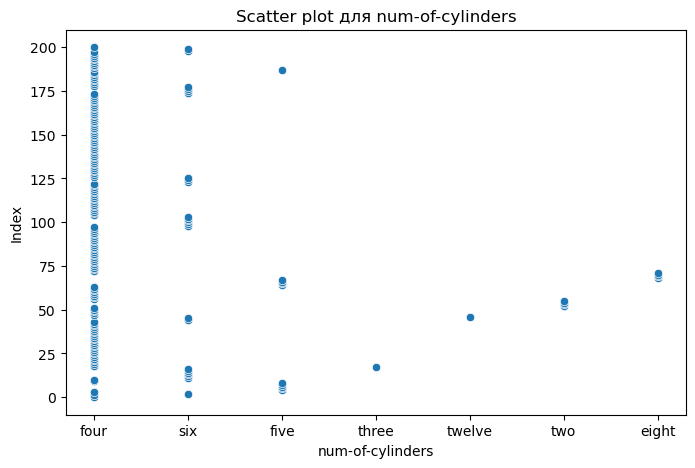

In [38]:
numeric_column = 'num-of-cylinders'  

# Побудова scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=numeric_column, y=range(len(df)), data=df)
plt.title(f'Scatter plot для {numeric_column}')
plt.xlabel(numeric_column)
plt.ylabel('Index')
plt.show()

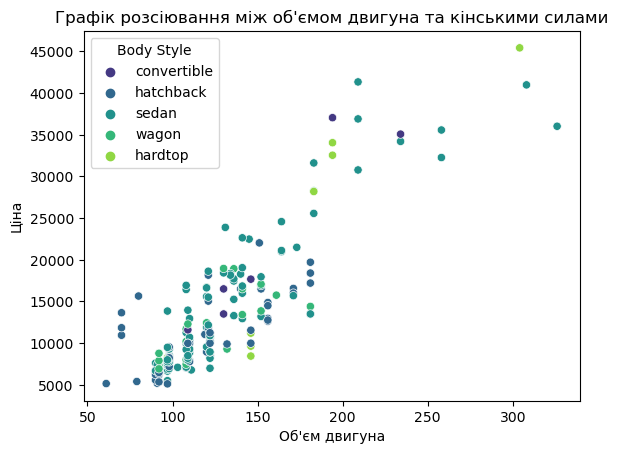

In [52]:
sns.scatterplot(x='engine-size', y='price', hue='body-style', data=df, palette='viridis', alpha=1)

plt.title('Графік розсіювання між об\'ємом двигуна та кінськими силами')
plt.xlabel('Об\'єм двигуна')
plt.ylabel('Ціна')
plt.legend(title='Body Style')
plt.show()